In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline\


import warnings
from warnings import filterwarnings
warnings.filterwarnings('ignore')

In [2]:
import io
%cd "C:\Users\leand\OneDrive\Desktop\Data Set\\Gov\RBI"

C:\Users\leand\OneDrive\Desktop\Data Set\Gov\RBI


In [3]:
# Load the data from the Excel file
df = pd.read_excel('Combine_NEFT.xlsx', sheet_name='HDFC')

# Print the first few rows to ensure data is loaded correctly
print(df.head())

   Month_End  NO. OF OUTWARD TRANSACTIONS  DEBIT AMOUNT (Rs. Lakh)  \
0 2019-01-31                     29689854             2.898021e+06   
1 2019-02-28                     28258016             2.566329e+06   
2 2019-03-31                     32921765             3.736370e+06   
3 2019-04-30                     28643861             3.181137e+06   
4 2019-05-31                     31391429             3.211340e+06   

   NO. OF INWARD TRANSACTIONS  CREDIT AMOUNT (Rs. Lakh)  
0                    16149139              2.726115e+06  
1                    15241001              2.535669e+06  
2                    17652249              3.593216e+06  
3                    15739941              2.913397e+06  
4                    16797767              3.055523e+06  


In [4]:
# Convert "Month_End" column to datetime format
df['Month_End'] = pd.to_datetime(df['Month_End'], format='%d-%m-%y')

# Set "Month_End" column as the index
df.set_index('Month_End', inplace=True)

# Print the first few rows to ensure everything looks good
print(df.head())

            NO. OF OUTWARD TRANSACTIONS  DEBIT AMOUNT (Rs. Lakh)  \
Month_End                                                          
2019-01-31                     29689854             2.898021e+06   
2019-02-28                     28258016             2.566329e+06   
2019-03-31                     32921765             3.736370e+06   
2019-04-30                     28643861             3.181137e+06   
2019-05-31                     31391429             3.211340e+06   

            NO. OF INWARD TRANSACTIONS  CREDIT AMOUNT (Rs. Lakh)  
Month_End                                                         
2019-01-31                    16149139              2.726115e+06  
2019-02-28                    15241001              2.535669e+06  
2019-03-31                    17652249              3.593216e+06  
2019-04-30                    15739941              2.913397e+06  
2019-05-31                    16797767              3.055523e+06  


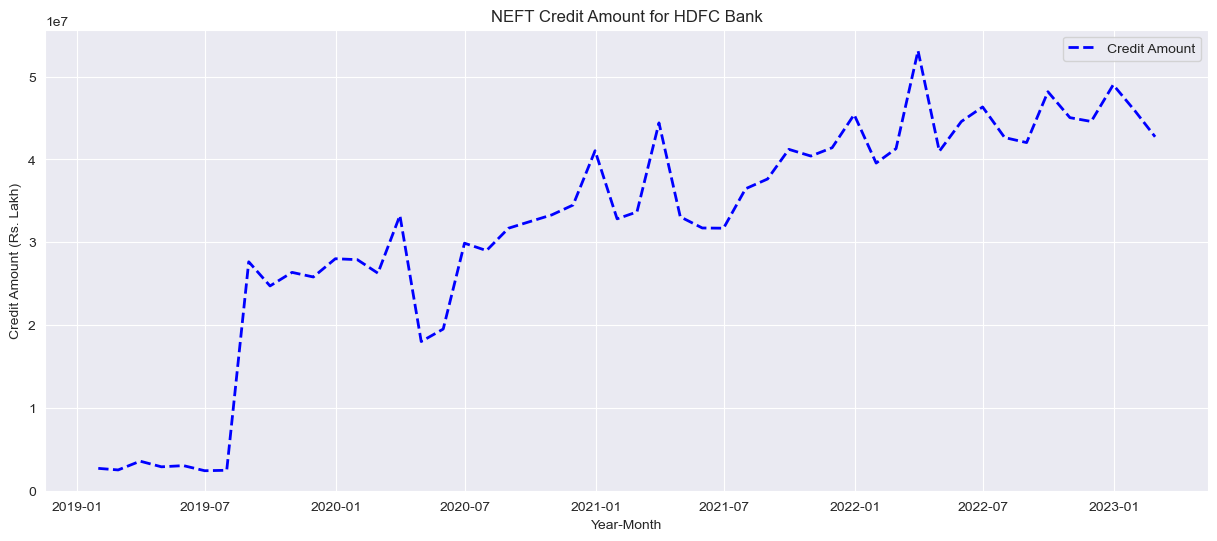

In [5]:
# Set plot style
sns.set_style('darkgrid')

# Plot the data
plt.figure(figsize=(15, 6))
plt.plot(df['CREDIT AMOUNT (Rs. Lakh)'], color='blue', linewidth=2, linestyle='--')

# Add title and axis labels
plt.title('NEFT Credit Amount for HDFC Bank')
plt.xlabel('Year-Month')
plt.ylabel('Credit Amount (Rs. Lakh)')

# Add legend
plt.legend(['Credit Amount'])

# Display the plot
plt.show()

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

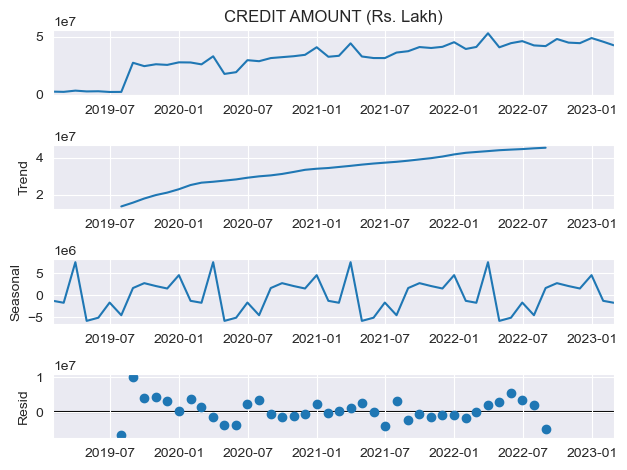

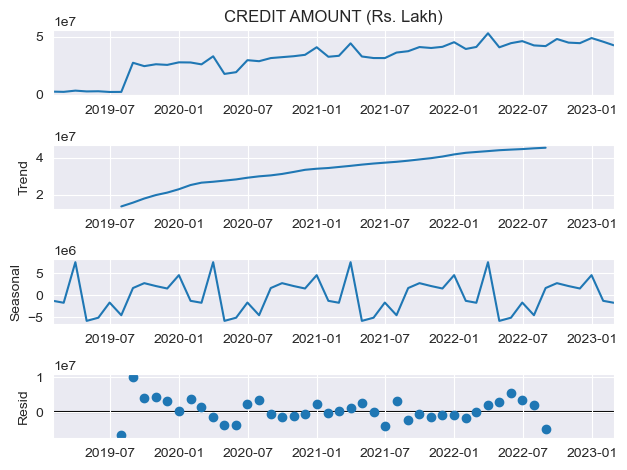

In [7]:
seasonal_decompose(df['CREDIT AMOUNT (Rs. Lakh)'],period=12).plot()

# Stationarity Test -

In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['CREDIT AMOUNT (Rs. Lakh)'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.040446
p-value: 0.031286
Critical Values:
	1%: -3.616
	5%: -2.941
	10%: -2.609


In [9]:
adfuller(df['CREDIT AMOUNT (Rs. Lakh)'])

(-3.040445611416984,
 0.03128606194017126,
 11,
 38,
 {'1%': -3.6155091011809297,
  '5%': -2.941262357486514,
  '10%': -2.6091995013850418},
 1266.9923253600027)

In [10]:
# Based on the results of the Augmented Dickey-Fuller (ADF) test, the p-value is less than 0.05
# Therefore, we can reject the null hypothesis that the time series is non-stationary 
# and conclude that the data is stationary.

In [11]:
HDFC=df['CREDIT AMOUNT (Rs. Lakh)']

# Seasonality Test - 

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(HDFC, model='multiplicative', period=12)

In [13]:
# Since the seasonal component appears to be similar between the additive and multiplicative decomposition techniques, 
# it may suggest that either approach could be appropriate for modeling the data

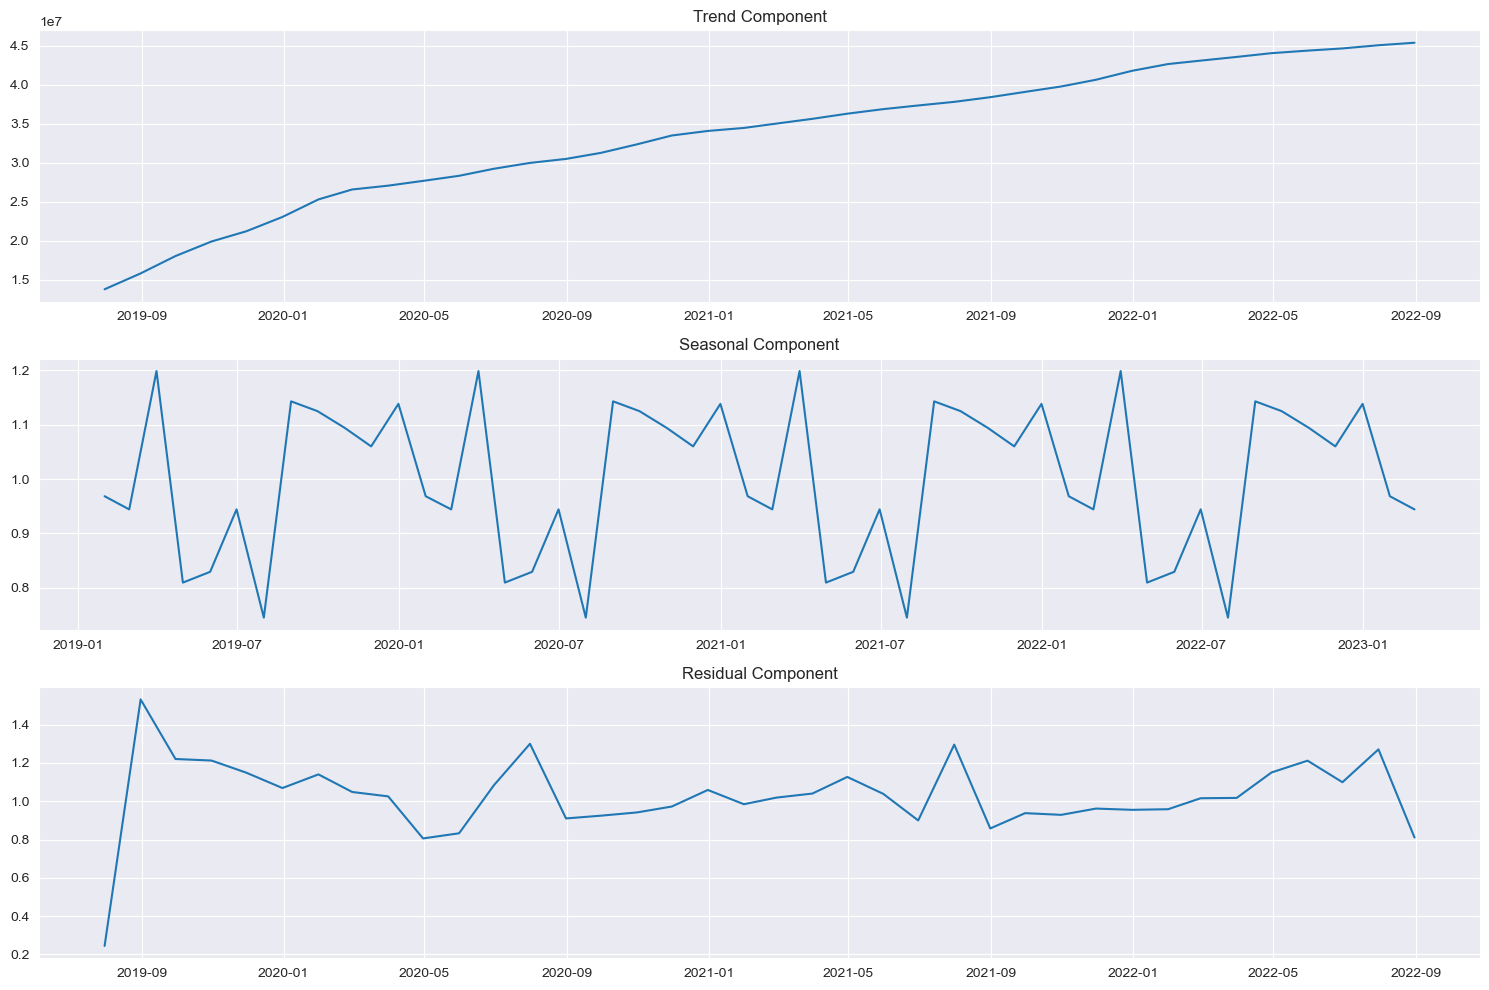

In [14]:
fig, ax = plt.subplots(3,1,figsize=(15,10))

ax[0].plot(decomposition.trend)
ax[0].set_title('Trend Component')

ax[1].plot(decomposition.seasonal)
ax[1].set_title('Seasonal Component')

ax[2].plot(decomposition.resid)
ax[2].set_title('Residual Component')

plt.tight_layout()
plt.show()

In [15]:
#  seasonal component in the decomposition plot shows a repeating behavior 
# for 3 times in 4 years, 
# it suggests that there is a seasonal pattern in the data

# To confirm seasonality - 

In [16]:
# computes the seasonal difference of the HDFC time series with a lag of 12 months. 
# This is done to remove the seasonality in the data
seasonal_diff = HDFC.diff(12)

# Removing missing values occured due to differencing values
seasonal_diff.dropna(inplace=True)

# Perform ADF test with seasonal differencing
result = adfuller(seasonal_diff)

# measure of how strongly the time series is stationary
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.0434960640576763
p-value: 0.031027271540380857


In [72]:
# The ADF statistic value of -3.04 and the p-value of 0.031 suggest that we can reject the null hypothesis 
# of the ADF test at a significance level of 0.05. 
# This means that the seasonal difference series is stationary

# If seasonal differencing lag is set to 3 -p-value: 0.06194926521122928, non stationarity

# This also proves that after using seasonal lag of 12 for differencing - has made our data stationary
# which means data might have seasonality

# Auto Arima

In [18]:
from pmdarima.arima import auto_arima

In [19]:
arimamodel = auto_arima(HDFC, seasonal=True, m=12, start_p=0, start_q=0)

In [20]:
arimamodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   50
Model:             SARIMAX(0, 1, 3)x(0, 0, [1, 2], 12)   Log Likelihood                -824.043
Date:                                 Sun, 07 May 2023   AIC                           1662.086
Time:                                         15:52:45   BIC                           1675.329
Sample:                                     01-31-2019   HQIC                          1667.110
                                          - 02-28-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.387e+05   8.61e+05      1.091      0.275   -7.48e+05    2.63e+06
ma.L1         -0.3911      0.238     -1.641      0.101      -0.858       0.076
ma.L2         -0.2607      0.176     -1.483      0.138      -0.605       0.084
ma.L3          0.1701      0.237      0.718      0.473      -0.295       0.635
ma.S.L12       0.5766      0.172      3.344      0.001       0.239       0.914
ma.S.L24       0.4708      0.228      2.069      0.039       0.025       0.917
sigma2      2.172e+13      0.000   6.64e+16      0.000    2.17e+13    2.17e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                61.37
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                             0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.11e+34. Standard errors may be unstable.
"""

In [21]:
import statsmodels.api as sm

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
model = SARIMAX(HDFC, order=(0, 1, 3), seasonal_order=(0, 0, [1, 2], 12))

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())

                                        SARIMAX Results                                        
Dep. Variable:                CREDIT AMOUNT (Rs. Lakh)   No. Observations:                   50
Model:             SARIMAX(0, 1, 3)x(0, 0, [1, 2], 12)   Log Likelihood                -825.246
Date:                                 Sun, 07 May 2023   AIC                           1662.492
Time:                                         15:52:46   BIC                           1673.842
Sample:                                     01-31-2019   HQIC                          1666.798
                                          - 02-28-2023                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3523      0.201     -1.756      0.079      -0.746       0

E:\Python_wD\Conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
E:\Python_wD\Conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Dep. Variable: This is the name of the dependent variable used in the model.

No. Observations: This is the number of observations used in the model.

Model: This is the order of the model, including the orders of the autoregressive (AR), differencing (I), and moving average (MA) components.

Log Likelihood: This is a measure of how well the model fits the data. Higher values indicate a better fit.

AIC: The Akaike Information Criterion is a measure of the relative quality of the model. Lower values indicate a better fit.

BIC: The Bayesian Information Criterion is another measure of the relative quality of the model. Lower values indicate a better fit.

Sample: This is the range of the data used in the model.

HQIC: The Hannan-Quinn Information Criterion is another measure of the relative quality of the model. Lower values indicate a better fit.

Covariance Type: This is the type of covariance used in the model.

Coef: These are the coefficients of the model. These indicate the strength and direction of the relationship between the dependent variable and the independent variables.

Std Err: These are the standard errors associated with each coefficient. These indicate the degree of uncertainty associated with the estimates of the coefficients.

z: These are the z-scores associated with each coefficient. These are used to test the statistical significance of the coefficients.

P>|z|: These are the p-values associated with each coefficient. These are used to test the statistical significance of the coefficients.

[0.025 0.975]: These are the lower and upper bounds of the 95% confidence interval associated with each coefficient.

Ljung-Box (L1) (Q): This is a test for autocorrelation of the residuals. A low p-value indicates that there is significant autocorrelation in the residuals.

Jarque-Bera (JB): This is a test for normality of the residuals. A low p-value indicates that the residuals are not normally distributed.

Prob(Q): This is the p-value associated with the Ljung-Box test.

Prob(JB): This is the p-value associated with the Jarque-Bera test.

Heteroskedasticity (H): This is a test for heteroskedasticity in the residuals. A low p-value indicates that there is significant heteroskedasticity in the residuals.

Skew: This is a measure of the skewness of the residuals. A value of 0 indicates no skew, while positive and negative values indicate right and left skew, respectively.

Prob(H) (two-sided): This is the p-value associated with the heteroskedasticity test.

Kurtosis: This is a measure of the kurtosis of the residuals. A value of 3 indicates a normal distribution, while higher and lower values indicate more peaked and flat distributions, respectively.

In [24]:
# Our Result



SARIM (0, 1, 3): This represents a zero order autoregressive process (AR), a first order autoregressive process (AR) with a time lag of 1, and a time shift of 3. The p-value for this term is 0.07, which is not significant at the 5% level, indicating that there is no evidence that the series is autoregressive at this level.


SAR (0, 0, [1, 2], 12): This represents a seasonal autoregressive process (SAR) with no time lag and a seasonal lag of 12. The p-value for this term is 0.02, which is significant at the 5% level, indicating that there is evidence that the series is seasonal at this level.


ma.L1: This represents a moving average process (MA) of order 1 with a time lag of 1. The p-value for this term is 0.17, which is not significant at the 5% level, indicating that there is no evidence that the series is influenced by this moving average process.


ma.L2: This represents a moving average process (MA) of order 2 with a time lag of 2. The p-value for this term is 0.171, which is not significant at the 5% level, indicating that there is no evidence that the series is influenced by this moving average process.


ma.L3: This represents a moving average process (MA) of order 3 with a time lag of 3. The p-value for this term is 0.29, which is not significant at the 5% level, indicating that there is no evidence that the series is influenced by this moving average process.


ma.S.L12: This represents a seasonal MA process (SAR) with a seasonal lag of 12. The p-value for this term is 0.024, which is significant at the 5% level, indicating that there is evidence that the series is influenced by this seasonal process.


The Ljung-Box statistic (Q) for the first lag is 0.01, and the p-value is 0.93, indicating that there is no evidence of autocorrelation in the residuals at the 5% significance level.


The Jarque-Bera (JB) statistic is 68.79, with a p-value of 0.00, indicating that the residuals are not normally distributed.


The AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values for the model are 1662.492 and 1673.842, respectively, and the log likelihood is -825.246.


The Heteroskedasticity (H) test statistic is 0.16 with a p-value of 0.00, indicating that there is evidence of heteroskedasticity in the residuals at the 5% significance level.


The model's sigma^2 (error variance component) is 2.258e+13, which is used to capture the variation in the series that is not explained by the other components.

 If the model has captured the patterns well, the autocorrelation between the residuals should be small, resulting in a higher p-value (i.e., prob(Q)) in the Ljung-Box test. This means that the residuals are independent and random, which indicates a good fit of the model to the data. On the other hand, if the p-value is low, it suggests that there is still some significant autocorrelation in the residuals, indicating that the model may not fit the data well and there may be more patterns or information left to be captured.

In [25]:
# Forecast for the next 3 months
forecast = results.forecast(steps=3)

# Print the forecast
print(forecast)

2023-03-31    5.017713e+07
2023-04-30    4.757863e+07
2023-05-31    4.809927e+07
Freq: M, Name: predicted_mean, dtype: float64


In [26]:
# Forecast for the next 3 months
forecast = results.forecast(steps=3)

# Get the actual predicted values
actual_forecast = forecast.values

# Print the forecast
print(actual_forecast)

[50177134.44711339 47578626.014118   48099272.85242154]


In [27]:
# Actual value on March - 57780468.41

In [28]:
pred_autarm = results.get_prediction(start=pd.to_datetime('2019-01-31'), dynamic=False)

In [29]:
pred_autarm_ci = pred_autarm.conf_int() # confidence interval at 95%

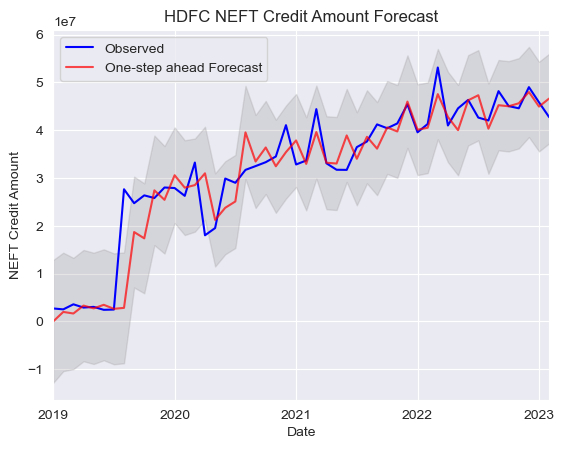

In [30]:
ax = HDFC['2019':].plot(label='Observed', color='blue')
pred_autarm.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, color='red')

ax.fill_between(pred_autarm_ci.index,
                pred_autarm_ci.iloc[:, 0],
                pred_autarm_ci.iloc[:, 1], color='gray', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('NEFT Credit Amount')
ax.set_title('HDFC NEFT Credit Amount Forecast')
plt.legend()
plt.show()

In [31]:
pred_autarm_ci.tail()

,lower CREDIT AMOUNT (Rs. Lakh),upper CREDIT AMOUNT (Rs. Lakh)
2022-10-31,3.556523e+07,5.444227e+07
2022-11-30,3.619272e+07,5.506592e+07
2022-12-31,3.856198e+07,5.741463e+07
2023-01-31,3.556486e+07,5.431426e+07
2023-02-28,3.725324e+07,5.599353e+07


# MSE

In [32]:
HDFC_forecasted_autarm = pred_autarm.predicted_mean
HDFC_truth_autarm = HDFC['2019-01-31':]

# Compute the mean square error
mse = ((HDFC_forecasted_autarm - HDFC_truth_autarm) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 27265779848799.53


In [33]:
import numpy as np

HDFC_forecasted = pred_autarm.predicted_mean
HDFC_truth = HDFC['2019-01-31':]

# Compute the mean square error
mse = ((HDFC_forecasted - HDFC_truth) ** 2).mean()

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 5221664.47


# Iterative approach for best AIC Score method - 

In [34]:
import itertools

In [35]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [36]:
# enforce_stationary False gives a difference of 2 from left in predicted value
# enforce_stationary set to True because data is stationary as proved by adfuller test

In [37]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
AIC = []
parm_ = []
parm_s = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(HDFC,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=False)

            results = mod.fit()
            AIC.append(results.aic)
            parm_.append(param)
            parm_s.append(param_seasonal)

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1879.8993417693205
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1873.0684347040142
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1354.2546536804903
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3702.546549228415
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1805.728585256306
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1815.596697261731
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1415.9974827782391
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1365.8689936285857
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1851.3787104313208
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1849.6715031163221
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1323.7241216063987
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3826.6621792349024
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1848.438211456656
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1850.402733984175
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1323.4092552738202
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1324.7312483419964
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1674.3770888881543
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1668.80376322269

In [38]:
min(AIC)

1248.738195278222

In [39]:
pos = AIC.index(min(AIC))

In [40]:
parm_[pos]

(0, 1, 1)

In [41]:
parm_s[pos]

(1, 1, 0, 12)

In [42]:
mod = sm.tsa.statespace.SARIMAX(HDFC,
                                order=parm_[pos],
                                seasonal_order=parm_s[pos],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4427      0.587     -0.755      0.451      -1.593       0.707
ar.S.L12      -0.1832      0.209     -0.876      0.381      -0.593       0.226
sigma2      2.961e+13   3.77e-16   7.86e+28      0.000    2.96e+13    2.96e+13


In [43]:
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:            CREDIT AMOUNT (Rs. Lakh)   No. Observations:                   50
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -415.469
Date:                             Sun, 07 May 2023   AIC                            836.939
Time:                                     15:52:50   BIC                            840.595
Sample:                                 01-31-2019   HQIC                           837.953
                                      - 02-28-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4427      0.587     -0.755      0.451      -1.593       0.707
ar.S.L12      -0.1832      

1. Dependent Variable: The dependent variable is "CREDIT AMOUNT (Rs. Lakh)".

2. Model Specifications: The SARIMAX model used is (0, 1, 1)x(1, 1, [], 12), where:


0: There is no autoregressive component.

1: There is one moving average component.

1: There is one seasonal autoregressive component with a seasonal lag of 12.

1: There is one seasonal differencing component.



Log Likelihood: The log likelihood of the model is -415.469.

3. Information Criteria: The AIC and BIC values for the model are 836.939 and 840.595, respectively. The HQIC value is 837.953.

4. Coefficients: The coefficients of the model are as follows:

ma.L1: The coefficient of the moving average component is -0.4427.
ar.S.L12: The coefficient of the seasonal autoregressive component is -0.1832.
Standard Errors: The standard errors of the coefficients are also reported.

p-values: The p-values of the coefficients are reported in the P>|z| column. The moving average component (ma.L1) has a p-value of 0.451, which is not significant at the 5% level. The seasonal autoregressive component (ar.S.L12) has a p-value of 0.381, which is also not significant at the 5% level.

Residuals: The Ljung-Box statistic (Q) for the first lag is 0.07, and the p-value is 0.78, indicating that there is no evidence of autocorrelation in the residuals at the 5% significance level. The Jarque-Bera (JB) statistic is 1.48, with a p-value of 0.48, indicating that the residuals are approximately normally distributed. The Heteroskedasticity (H) test statistic is 0.70 with a p-value of 0.63, indicating that there is no evidence of heteroskedasticity in the residuals at the 5% significance level.

Error Variance Component: The model's sigma^2 (error variance component) is 2.961e+13, which is used to capture the variation in the series that is not explained by the other components.

 Ljung Box Test of Residuals
 Null - Model Does not show lack of fit or model is fine
 Alt - Model Does show lack of fit or model is not fine

 Since Prob(Q):0.78 > 0.05
 we fail to reject the null hypothesis and conclude that there is no evidence of autocorrelation in the residuals. 

# Therefore, we can say that the SARIMAX model is a good fit for the data

In [44]:
# Forecast for the next 12 months
forecast = results.forecast(steps=12)

# Print the forecast
print(forecast)

2023-03-31    5.590575e+07
2023-04-30    4.392332e+07
2023-05-31    4.660286e+07
2023-06-30    4.803718e+07
2023-07-31    4.589162e+07
2023-08-31    4.561202e+07
2023-09-30    5.127897e+07
2023-10-31    4.857645e+07
2023-11-30    4.838501e+07
2023-12-31    5.273034e+07
2024-01-31    4.905598e+07
2024-02-29    4.685533e+07
Freq: M, Name: predicted_mean, dtype: float64


In [45]:
# Forecast for the next 12 months
forecast = results.forecast(steps=12)

# Get the actual predicted values
actual_forecast = forecast.values

# Print the forecast
print(actual_forecast)

[55905753.87926256 43923315.44622812 46602864.63230658 48037176.52120384
 45891619.43803692 45612017.93380692 51278968.78134716 48576446.85504313
 48385006.34027494 52730336.72099826 49055982.25147495 46855330.54473782]


# Actual value on March - 57780468.41 or  57780468.41 is equal to 577.80 lakhs (rounded to two decimal places)

 Prediction for March April June using iterative approach to find least ACI gives better result than auto arima

In [46]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-31'), dynamic=False)

In [47]:
# pred = results.get_prediction(start=pd.to_datetime('2019-01-31'), dynamic=False)

# generates a prediction object pred 
# that contains the predicted mean values and confidence intervals for the out-of-sample 
# period starting from January 31, 2019

In [48]:
# dynamic=False - ensures that the one-step-ahead forecasts are solely based on the actual data up to that point, 
# making them more accurate and reliable

In [49]:
# Confidence Interval - 

In [50]:
pred_ = pred.conf_int() # confidence interval at 95%

In [51]:
pred_.tail()

,lower CREDIT AMOUNT (Rs. Lakh),upper CREDIT AMOUNT (Rs. Lakh)
2022-10-31,3.660310e+07,5.793390e+07
2022-11-30,3.640319e+07,5.773400e+07
2022-12-31,3.948410e+07,6.081491e+07
2023-01-31,3.255785e+07,5.388866e+07
2023-02-28,3.557775e+07,5.690855e+07


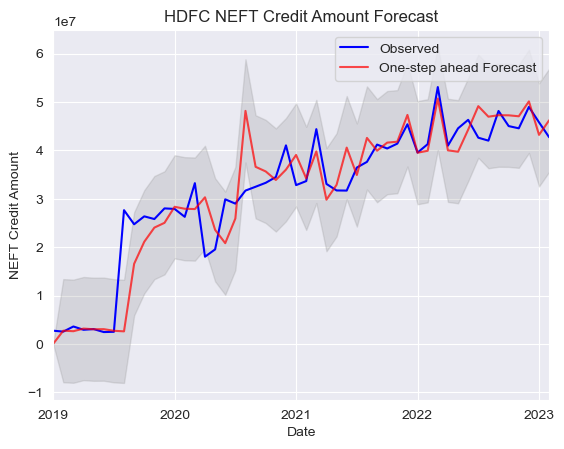

In [52]:
ax = HDFC['2019':].plot(label='Observed', color='blue')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, color='red')

ax.fill_between(pred_.index,
                pred_.iloc[:, 0],
                pred_.iloc[:, 1], color='gray', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('NEFT Credit Amount')
ax.set_title('HDFC NEFT Credit Amount Forecast')
plt.legend()
plt.show()


In [53]:
# Note - predicted_mean is not statistical MEAN

# in the context of time-series forecasting, the term "predicted mean" is used to refer to 
# the central or average predicted value for each timestamp in the forecasting period.

# Mean Squared Error

In [54]:
HDFC_forecasted = pred.predicted_mean
HDFC_truth = HDFC['2019-01-31':]

# Compute the mean square error
mse = ((HDFC_forecasted - HDFC_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 33493114487854.79


In [55]:
# 3,34,93,11,44,87,854.79

In [56]:
import numpy as np

HDFC_forecasted = pred.predicted_mean
HDFC_truth = HDFC['2019-01-31':]

# Compute the mean square error
mse = ((HDFC_forecasted - HDFC_truth) ** 2).mean()

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))


The Root Mean Squared Error of our forecasts is 5787323.6


The root mean squared error (RMSE) is a common evaluation metric used in time series analysis 
to assess the accuracy of forecasting models.


 It measures the difference between the predicted values and the actual values in the data set, 
 taking the square root of the average of the squared differences.


 In this case, the RMSE value of 5787323.6 indicates that, on average, the forecasted values are 
 off by approximately 5.8 million rupees from the actual values.

 The RMSE value provides an estimate of the average magnitude of the forecasting error, 
 which can help in assessing the performance of the forecasting model and making adjustments if necessary.

In [57]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2023-03-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [58]:
pred_dynamic_ci.tail()

,lower CREDIT AMOUNT (Rs. Lakh),upper CREDIT AMOUNT (Rs. Lakh)
2023-03-31,4.524035e+07,6.657116e+07


# Prophet

In [59]:
from prophet import Prophet

In [60]:
df=df.reset_index()

In [61]:
df

,Month_End,NO. OF OUTWARD TRANSACTIONS,DEBIT AMOUNT (Rs. Lakh),NO. OF INWARD TRANSACTIONS,CREDIT AMOUNT (Rs. Lakh)
0,2019-01-31,29689854,2.898021e+06,16149139,2.726115e+06
1,2019-02-28,28258016,2.566329e+06,15241001,2.535669e+06
2,2019-03-31,32921765,3.736370e+06,17652249,3.593216e+06
3,2019-04-30,28643861,3.181137e+06,15739941,2.913397e+06
4,2019-05-31,31391429,3.211340e+06,16797767,3.055523e+06
5,2019-06-30,28498860,2.864945e+06,15548795,2.441602e+06
6,2019-07-31,31364234,2.850976e+06,17024783,2.495721e+06
7,2019-08-31,31222892,2.747060e+07,16636855,2.764962e+07
8,2019-09-30,29311587,2.870296e+07,15952845,2.473645e+07
9,2019-10-31,33874396,3.018609e+07,17813855,2.637374e+07


In [62]:
y=df['CREDIT AMOUNT (Rs. Lakh)']

In [63]:
ds=df['Month_End']

In [64]:
df = pd.concat([ds, y], axis=1)

In [65]:
df.columns=['ds','y']

In [66]:
m=Prophet()
m.fit(df)

15:52:51 - cmdstanpy - INFO - Chain [1] start processing
15:52:51 - cmdstanpy - INFO - Chain [1] done processing


In [67]:
future = m.make_future_dataframe(periods=12,freq='M')

In [68]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
47,2022-12-31,5.249014e+07,4.803094e+07,5.689702e+07
48,2023-01-31,4.864220e+07,4.398167e+07,5.339704e+07
49,2023-02-28,4.520902e+07,4.063271e+07,4.986272e+07
50,2023-03-31,5.258461e+07,4.811647e+07,5.703566e+07
51,2023-04-30,4.897666e+07,4.464403e+07,5.357095e+07
52,2023-05-31,4.912214e+07,4.438073e+07,5.375707e+07
53,2023-06-30,4.581419e+07,4.151730e+07,5.052226e+07
54,2023-07-31,4.323385e+07,3.879721e+07,4.769415e+07
55,2023-08-31,5.842815e+07,5.383284e+07,6.267545e+07
56,2023-09-30,5.763749e+07,5.297307e+07,6.222653e+07


In [69]:
# 52 , 48 , 49
# for March , April and May

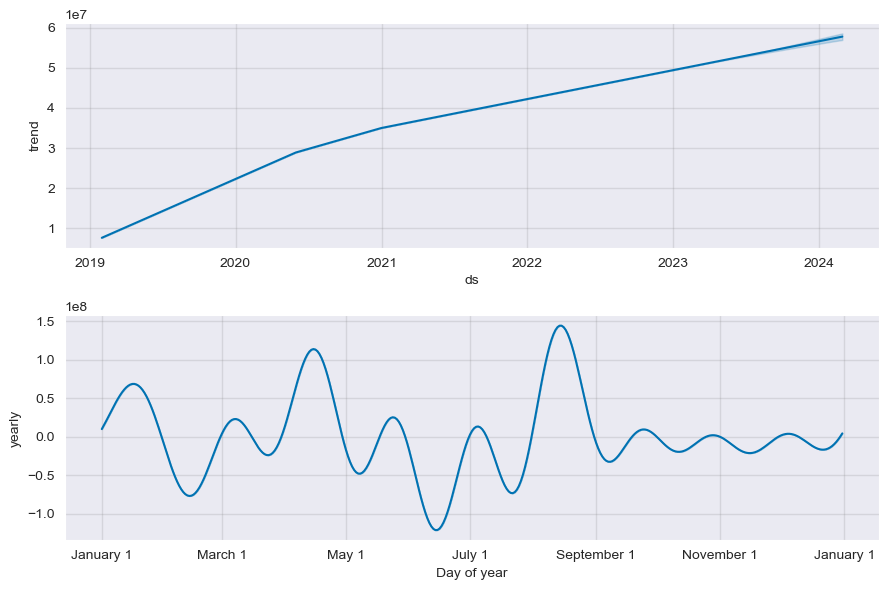

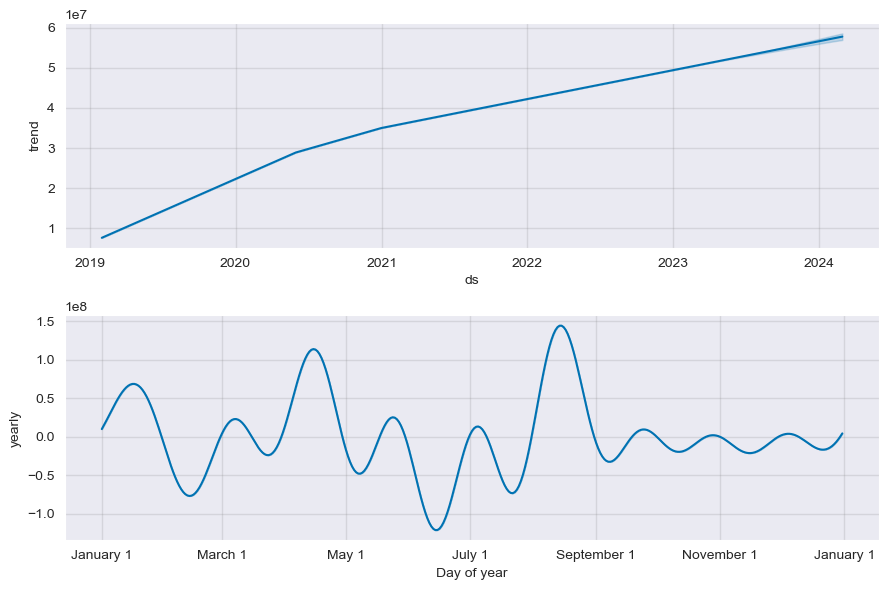

In [70]:
m.plot_components(forecast)

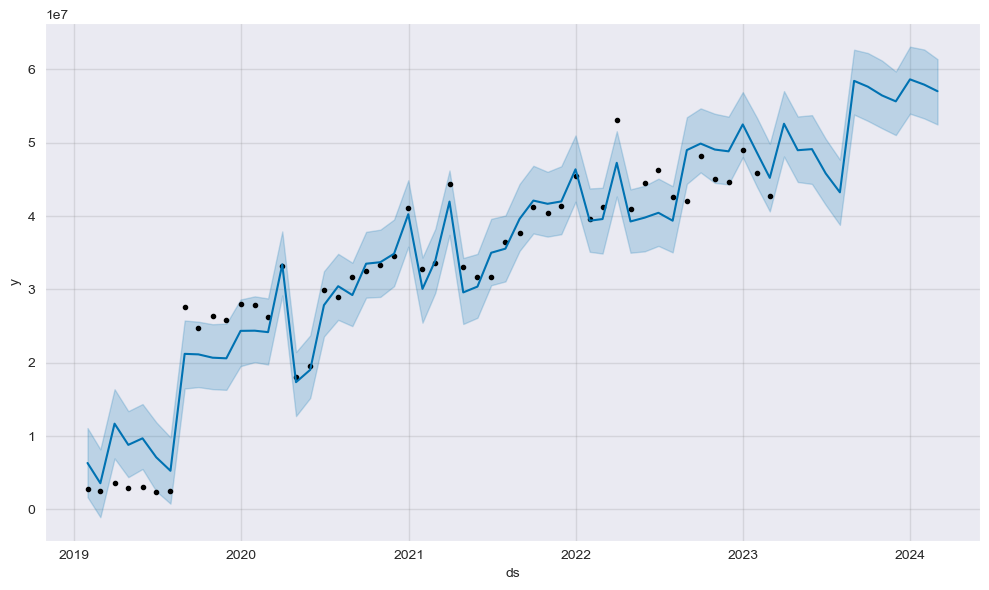

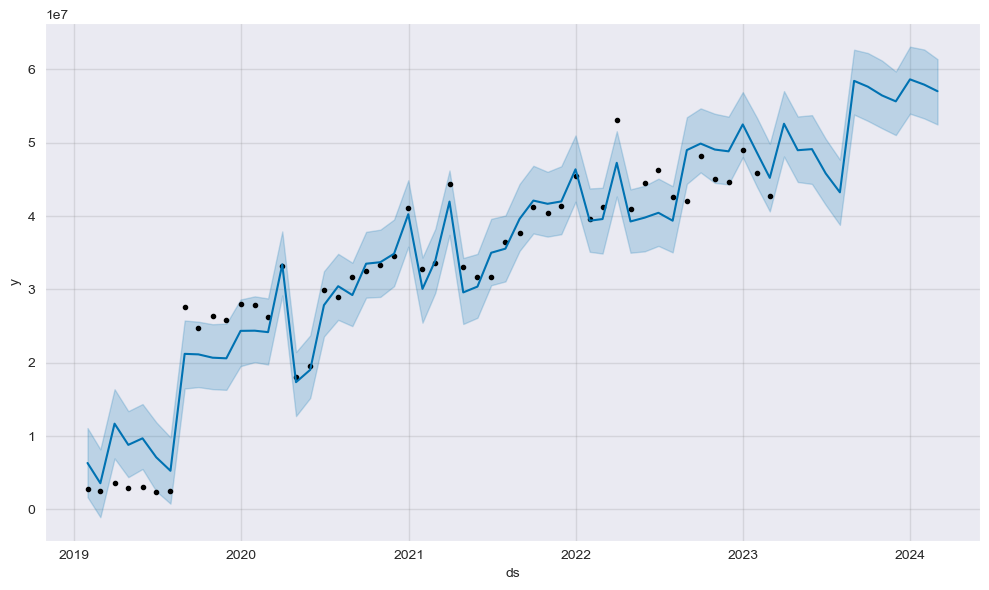

In [71]:
m.plot(forecast)